In [ ]:
!date
!python --version

Fri Apr 25 01:33:25 AM UTC 2025
Python 3.11.12


更新履歴
- 2025年4月25日: df.describe()後の指定例追加。

# Pandas, Matplotlib, Plotlyを用いたデータ分析例
POSレジ購買データ（疑似データ）を例に代表的な使い方を例示します。なおこれらの細かい使い方は膨大なため、今回は一例として紹介するに留めます。より詳細は参考サイトを参照ください（=調べながら使えるようになりましょう。個別相談には応じます）。
- **大前提**
  - 今回は全体の流れを確認しながら一部コード修正して実行する練習をしていきます。より詳細なプログラムの書き方や実行方法はその都度説明しますので、今回で全てを覚える必要はありません。
- 疑似データ
    - [data.csv](../assets/data.csv) を使います。
      - step 1: Google Colabratoryで新規ノートブックを用意してください。
      - step 2: 授業資料フォルダを開き、data.csvを用意してください。
      - step 3: data.csvをノートブックにアップロードしてください。
- 今回のデータ説明
    - purchase_date: 購入日（yyyy-mm-dd hh:mm:ss）
    - year: 購入年 (yyyy)
    - month: 購入月 (mm)
    - day_of_week: 曜日 (str)
    - time_of_day: 購入日（hh:mm:ss）
    - weather: 天候 (str)
    - age_group: 年代 (str)
    - gender: 性別 (str), 10代〜40代、50代以上
    - persona: 顧客属性 (str), 社会人、学生
    - purchase_tendency: 購入傾向 (dict)
    - product_name: 購入カテゴリ (list[str])
    - price: 購入金額 (float)
    - **疑似データ**です。同じ時間帯に天候が変わってたり、秒単位で同じ履歴があったり、金額に小数点があったりします。夏に雪がふることもあります。世界中に展開してるコンビニチェーン店全ログぐらいに捉えてください。

- より深く学ぶための参考サイト
    - pandas: [ [公式チュートリアル](https://pandas.pydata.org/docs/user_guide/10min.html) | [100 pandas puzzles](https://notebook.community/prashantas/MyDataScience/Python/100-pandas-puzzles-with-solutions) | [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) ]
    - plotly: [ [公式チュートリアル](https://plotly.com/python/getting-started/) | [basic charts](https://plotly.com/python/basic-charts/) | [cheat sheet](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf) ]
    - matplotlib: [ [公式チュートリアル](https://matplotlib.org/stable/tutorials/index.html) | [examples](https://matplotlib.org/stable/gallery/index.html) | [cheat sheet](https://matplotlib.org/cheatsheets/) ]
- 具体的なデータを利用したチュートリアル
    - [マンガと学ぶデータビジュアライゼーション](https://kakeami.github.io/viz-madb/index.html)

## データ読み込み〜例示
pd.read_csv等で読み込んだデータはpd.DataFrame型（データフレーム型）と呼ばれる。ノートブック内でデータフレーム形式で保存した変数名を書くと、きれいな表敬式で出力してくれる。通常の.pyファイルでprint関数により出力することもできるが、ノートブックと比べると見づらい。
- [pd.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html): CSVファイル読み込み用の関数。
- [pd.read_excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html): Excelファイルを読み込むこともできる（今回は未使用）

In [ ]:
# matplotlibで日本語を使うためのライブラリをインストール
!pip install japanize_matplotlib

### ライブラリの読み込み
プログラミングにおける「ライブラリ」とは、特定の機能をまとめたものを指すことが多いです。

日常生活で例えると、例えば英文を読んでいるときに分からない単語が出てきたら書籍やアプリにより英文辞書を用意し、調べるでしょう。これに対し数学を勉強しているときに英文辞書は不要なので片付けておくでしょう。このように必要なときに取り出し、不要なときには片付けておくことで卓上スペースを有効活用することができます。

プログラムにおける「ライブラリの読み込み」は、同じように効率良く使うための工夫です。一般的にPCでの処理はストレージに保存されているものをメモリに読み込み、CPUやGPUにより処理されます。メモリはストレージに対して高速に動作しますがその分高価なので容量が小さいです。このためメモリには必要な情報だけを置いておきたいです。これを実現しているのが「ライブラリの読み込み」です。

- 今回利用するライブラリ
  - pandasは表形式（正確にはデータフレーム形式）のデータを処理するためのライブラリです。``as pd``と書いているのは、プログラム中で「pd」と省略して書くために別称を設定しています。
  - plotly, matplotlibは、グラフ描画のためのライブラリです。
  - ``%matplotlib inline``は、ノートブック固有の記述です。ノートブック中にグラフを描画するために書いています。
  - japanize_matplotlibは、matplotlibで日本語フォントを利用するためのライブラリです。

- 参考
  - [IT用語辞典 > ソフトウェア > プログラミング > 開発環境 > ライブラリとは](https://www.sophia-it.com/content/%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA)

In [ ]:
# ライブラリの読み込み
import pandas as pd
import plotly.express as px

%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib

### データの読み込み
- ``pd.read_csv()`` は、「pdライブラリの中にある関数read_csv()を実行せよ」という命令です。カッコ内でCSVファイルの名前を指定することで、該当ファイルを読み込み、データフレームとして利用することができます。
- ``df = pd.read_csv()`` は、「pd.read_csv()の実行結果を変数dfに保存せよ」という命令です。実行結果を変数に保存しておかないと、参照する（利用する）ことができません。
- ``df`` は、「変数dfの中身を出力しろ」という命令です。

In [ ]:
# データ読み込み
# assets/data.csvをアップロードしてから実行する。
df = pd.read_csv("data.csv")
df

,purchase_date,year,month,day_of_week,time_of_day,weather,age_group,gender,persona,purchase_tendency,product_name,price
0,2022-01-01 10:47:25,2022,1,Saturday,10:47:25,晴れ,10代,男性,学生,"{'おにぎり': 0.1, '野菜飲料': 0.05, 'エナジードリンク': 0.1500...",['お菓子'],158.39
1,2022-01-01 11:20:06,2022,1,Saturday,11:20:06,雨,10代,男性,社会人,"{'おにぎり': 0.1, '野菜飲料': 0.05, 'エナジードリンク': 0.05, ...",['傘'],1422.74
2,2022-01-01 11:43:07,2022,1,Saturday,11:43:07,雨,30代,女性,社会人,"{'おにぎり': 0.2, '野菜飲料': 0.2, 'エナジードリンク': 0.25, '...",['エナジードリンク'],483.69
3,2022-01-01 11:58:43,2022,1,Saturday,11:58:43,晴れ,20代,女性,学生,"{'おにぎり': 0.2, '野菜飲料': 0.2, 'エナジードリンク': 0.35, '...",['お菓子'],173.22
4,2022-01-01 12:11:03,2022,1,Saturday,12:11:03,晴れ,40代,男性,学生,"{'おにぎり': 0.2, '野菜飲料': 0.25, 'エナジードリンク': 0.1500...",['アイス'],248.47
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-12-31 21:34:22,2022,12,Saturday,21:34:22,晴れ,50代以上,男性,学生,"{'おにぎり': 0.3, '野菜飲料': 0.25, 'エナジードリンク': 0.1500...",['清涼飲料水'],784.93
9996,2022-12-31 21:55:54,2022,12,Saturday,21:55:54,晴れ,10代,男性,社会人,"{'おにぎり': 0.1, '野菜飲料': 0.05, 'エナジードリンク': 0.05, ...",['お菓子'],152.61
9997,2022-12-31 22:03:36,2022,12,Saturday,22:03:36,晴れ,50代以上,女性,学生,"{'おにぎり': 0.3, '野菜飲料': 0.4, 'エナジードリンク': 0.15000...",['お菓子'],131.72
9998,2022-12-31 22:25:55,2022,12,Saturday,22:25:55,晴れ,30代,男性,学生,"{'おにぎり': 0.2, '野菜飲料': 0.05, 'エナジードリンク': 0.35, ...",['おにぎり'],1227.61


## データフレームの概要
列ごとのNullじゃない要素数や、数値データかどうかを確認する際には pd.info() が便利です。``Null``とは「欠落や欠損」を意味します。世の中には一部が欠落しているデータが良くあります。
- [pd.info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

In [ ]:
# 各列の基本情報
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   purchase_date      10000 non-null  object 
 1   year               10000 non-null  int64  
 2   month              10000 non-null  int64  
 3   day_of_week        10000 non-null  object 
 4   time_of_day        10000 non-null  object 
 5   weather            10000 non-null  object 
 6   age_group          10000 non-null  object 
 7   gender             10000 non-null  object 
 8   persona            10000 non-null  object 
 9   purchase_tendency  10000 non-null  object 
 10  product_name       10000 non-null  object 
 11  price              10000 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 937.6+ KB


## 数値データに関する基本統計量
今回のデータでは year, month, price が数値データになっている。これらに対する基本統計量を見るには pd.descriobe() を使おう
- [pd.describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [ ]:
# 数値データに関する基本統計量
df.describe()

,year,month,price
count,10000.0,10000.000000,10000.000000
mean,2022.0,6.583700,889.433363
std,0.0,3.441334,688.305266
min,2022.0,1.000000,50.080000
25%,2022.0,4.000000,276.595000
50%,2022.0,7.000000,767.475000
75%,2022.0,10.000000,1263.915000
max,2022.0,12.000000,2998.880000


In [ ]:
# 特定の値、例えば price列 の max を抜き出すには次のように書く。
# 書式：df['列名'].describe()['行名']
df['price'].describe()['max']

np.float64(2998.88)

In [ ]:
# もしくは次のように書くこともできる
df['price'].max()

2998.88

## 数値データの出現分布 => ヒストグラム
ヒストグラムを描画するには matplotlib か plotly を使うことが多い。どちらかというとplotlyの方がスタイリッシュに見えやすくインタラクティブな図も作成しやすいことから、ここではplotlyを使ってみよう。

描画ライブラリは指定できる引数が極めて多く、最低限データフレームとその列名を与える必要がある。
- [px.histogram](https://plotly.com/python/histograms/)
  - 代表的な引数
    - x: データフレームにおける列名。
    - nbins: ビン数。
    - marginal: "box"と書くと箱ひげ図も追加。

In [ ]:
# 数値データに関するヒストグラム
px.histogram(df, x="price")

In [ ]:
# パラメータ指定によりカスタマイズできる
px.histogram(df, x="price", nbins=20, marginal="box")

## カテゴリデータの出現回数
product_nameには購入カテゴリ名が書かれている。各カテゴリが出現した回数をカウントするには df["カテゴリ名"].value_counts() という形式で確認することができる。カテゴリ名を省略して実行することもできるが、この場合には参照しづらいこともあるので使い分けよう。
- [pd.value_counts](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)

In [ ]:
# カテゴリデータに関する出現回数
df.value_counts("day_of_week")

,count
day_of_week,
Monday,1530
Friday,1464
Tuesday,1451
Wednesday,1444
Saturday,1418
Sunday,1368
Thursday,1325


## 演習3.1: カテゴリデータの出現回数
他のカテゴリデータ（age_group, gender, product_name）についても出現回数を確認してみよう。

## クロス分析
今回のデータには age_group（顧客の年代カテゴリ）も含まれている。そこで「10代の購入したカテゴリ集計」「20代の購入したカテゴリ集計」というように年代カテゴリごとに集計を見てみたい、というような2変数以上の組み合わせを考慮することを「クロス分析」と呼ぶ。このような場合には pd.crosstab か pd.groupby を使おう。以下では両方のコード例を示しているが、直感的に使いやすいのはcrosstabの方だろう。
- [pd.crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)
- [pd.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)


In [ ]:
# クロス分析 (pd.groupbyの例)
labels = ["age_group", "product_name"]
data = df[labels]
cross = data.groupby(labels).size().unstack() # 組み合わせの頻度を計算
cross

product_name,['おにぎり'],['お菓子'],['アイス'],['エナジードリンク'],['ビッグ弁当'],['傘'],['清涼飲料水'],['野菜飲料']
age_group,,,,,,,,
10代,78,161,186,76,301,101,255,103
20代,183,183,205,261,145,128,185,125
30代,220,189,220,303,187,128,202,148
40代,225,192,243,98,77,161,341,365
50代以上,712,448,513,242,184,354,762,810


In [ ]:
# クロス分析（pd.crosstabの例）
cross = pd.crosstab(index=df["age_group"], columns=df["product_name"])
cross


product_name,['おにぎり'],['お菓子'],['アイス'],['エナジードリンク'],['ビッグ弁当'],['傘'],['清涼飲料水'],['野菜飲料']
age_group,,,,,,,,
10代,78,161,186,76,301,101,255,103
20代,183,183,205,261,145,128,185,125
30代,220,189,220,303,187,128,202,148
40代,225,192,243,98,77,161,341,365
50代以上,712,448,513,242,184,354,762,810


## クロス分析結果を描画
plotlyの棒グラフで描画するなら px.bar を使おう。
- [px.bar](https://plotly.com/python/bar-charts/)

In [ ]:
# プロット作成（カウント）
fig = px.bar(cross, barmode="stack", text="product_name")
fig.show()

## カウントではなく割合で見たい場合
pd.sumで総和を取り、pd.divで割り算することで割合を求めた上で描画する。
- [pd.sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)
- [pd.div](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html)

In [ ]:
# プロット作成（割合）
# グループごとの合計値で各値を割る
cross_ratio = cross.div(cross.sum(axis=1), axis=0)
fig = px.bar(cross_ratio, barmode="stack", text="product_name")
fig.show()

## 演習3.2: クロス集計の描画
以下のクロス集計を積み上げ棒グラフで作成し、気づいたことを報告しよう。
- クロス1: gender x product_name
- クロス2: persona x product_name
- クロス3: month x product_name

## 3変数のクロス集計
今回のデータには gender（性別）もある。「年代 x 性別」毎の集計を取るには、indexで複数指定する必要がある。

In [ ]:
cross3 = pd.crosstab(index=[df["age_group"],df["gender"]], columns=df["product_name"])
cross3

product_name      ['おにぎり']  ['お菓子']  ['アイス']  ['エナジードリンク']  ['ビッグ弁当']  ['傘']  \
age_group gender                                                               
10代       女性            33       69       80            36        125     47   
          男性            45       92      106            40        176     54   
20代       女性            97       92       89           124         44     73   
          男性            86       91      116           137        101     55   
30代       女性           104       90      116           139         55     65   
          男性           116       99      104           164        132     63   
40代       女性           126       89      132            53          0     83   
          男性            99      103      111            45         77     78   
50代以上     女性           341      241      255           120          0    183   
          男性           371      207      258           122        184    171   

product_name      ['清涼飲料水']  ['野菜飲料']  
age_group gender                       
10代       女性            127        83  
          男性            128        20  
20代       女性            104       103  
          男性             81        22  
30代       女性             87       122  
          男性            115        26  
40代       女性            153       217  
          男性            188       148  
50代以上     女性            399       505  
          男性            363       305

## 3変数クロス分析の描画
残念ながら3変数クロス分析結果をplotlyでそのまま描画することはできない。工夫するとできるが、ここでは簡易さの観点から matplotlib を使ってみよう。
- [plt.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

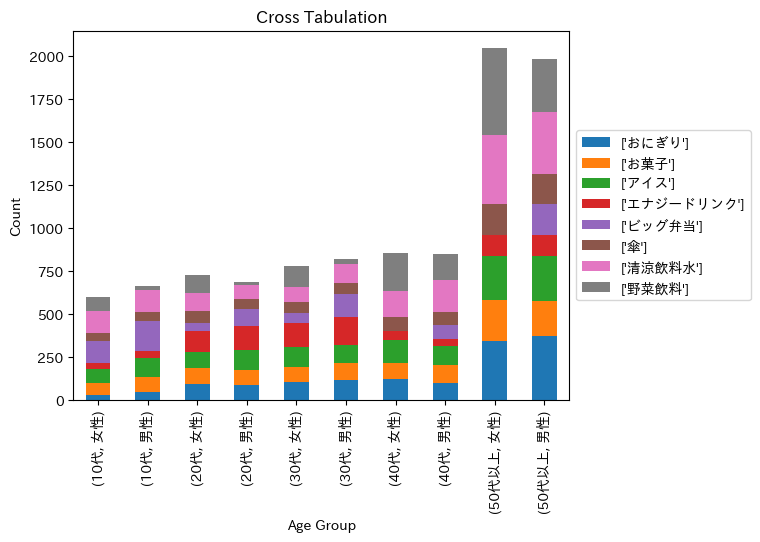

In [ ]:
# クロス集計結果のカテゴリ順序を指定する
age_order = sorted(list(df["age_group"].unique()))
cross3 = cross3.reindex(age_order, level='age_group')

# バープロットを作成する
ax = cross3.plot(kind='bar', stacked=True)

# グラフの設定
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Cross Tabulation')

# 凡例を表示
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# プロットを表示する
plt.show()

## 月毎の集計
- [px.line](https://plotly.com/python/line-charts/)

In [ ]:
# 商品別の購買数を月ごとに集計
monthly_counts = df.groupby(['month', 'product_name']).size().reset_index(name='purchase_count')
monthly_counts

,month,product_name,purchase_count
0,1,['おにぎり'],104
1,1,['お菓子'],180
2,1,['アイス'],46
3,1,['エナジードリンク'],70
4,1,['ビッグ弁当'],84
...,...,...,...
91,12,['エナジードリンク'],72
92,12,['ビッグ弁当'],70
93,12,['傘'],67
94,12,['清涼飲料水'],146


In [ ]:
# 購買数の集計結果をplotlyで描画
fig = px.line(monthly_counts, x='month', y='purchase_count', color='product_name', title='Monthly Purchase Counts by Product')
fig.show()